# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [21]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [6]:
employees = pd.read_csv("absences.csv")

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

In [7]:
# your code here
x = employees["Age"]
y = employees["Absences"]

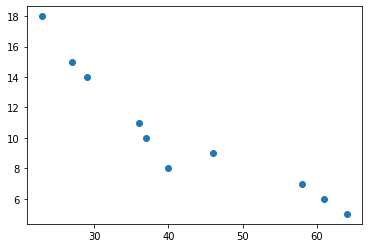

In [8]:
# your comments here
plt.scatter(x,y)
plt.show()

In [ ]:
#It seems there is a correlation

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [11]:
# your code here

age_mean = np.mean(x)
abscence_mean = np.mean(y)

X = np.array([x - age_mean for x in x ])
Y = np.array([y - abscence_mean for y in y ])

numerator = np.sum(X * Y)
XY2 = np.array([(a - age_mean)**2 for a in x])
denominator = np.sum(XY2)
slope = numerator / denominator
slope

-0.2681088337033404

In [14]:
intercept = abscence_mean - (slope*age_mean)
intercept

21.58738189891063

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

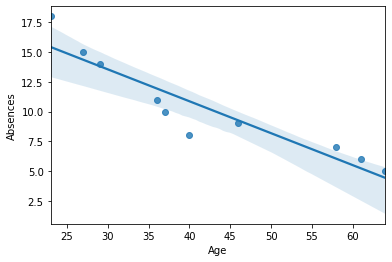

In [16]:
# your code here
sns.regplot(x='Age',y='Absences',data=employees)
plt.show()

In [ ]:
# your comments here

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [17]:
# your code here
covariance = employees.cov()
covariance

,Unnamed: 0,EmployeeID,Age,Absences
Unnamed: 0,9.166667,9.166667,9.055556,-4.388889
EmployeeID,9.166667,9.166667,9.055556,-4.388889
Age,9.055556,9.055556,215.211111,-57.700000
Absences,-4.388889,-4.388889,-57.700000,17.788889


In [18]:
correlation = employees.corr()
correlation

,Unnamed: 0,EmployeeID,Age,Absences
Unnamed: 0,1.000000,1.000000,0.203881,-0.343696
EmployeeID,1.000000,1.000000,0.203881,-0.343696
Age,0.203881,0.203881,1.000000,-0.932543
Absences,-0.343696,-0.343696,-0.932543,1.000000


#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [24]:
# your code here
corr = stats.pearsonr(x, y)
print(corr)

(-0.9325434092481011, 8.346015920483615e-05)


In [ ]:
# your comments here


#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# your comments here
# We can see a strong correlation between age and absences

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [27]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [29]:
# your code here
ironbeers_df.cov()

,X,Y
X,18.857143,12.0
Y,12.000000,8.0


In [30]:
ironbeers_df.corr()

,X,Y
X,1.000000,0.977008
Y,0.977008,1.000000


In [ ]:
# your comments here
#strong correlation

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

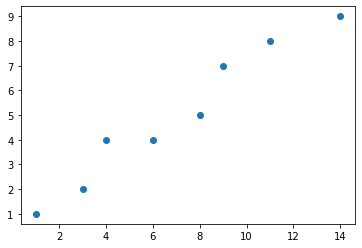

In [31]:
# your code here
x = ironbeers_df["X"]
y = ironbeers_df["Y"]
scatter = plt.scatter(x, y)

In [ ]:
# your comments here
#When x increases, y increases as well

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X', ylabel='Y'>

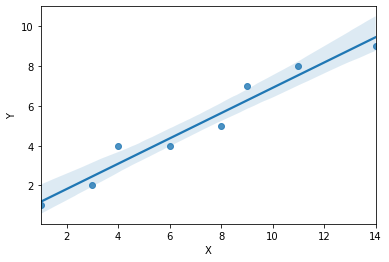

In [32]:
# your code here
sns.regplot(x, y, data = ironbeers_df)

In [ ]:
# your comments here
#When x increases, y increases as well

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here